<a href="https://colab.research.google.com/github/VinaySingh561/awesome-decision-tree-papers/blob/master/Decision_tree_pre_pruning_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris


In [3]:
iris= load_iris()

In [4]:
import seaborn as sns
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
X = data.iloc[:, :-1].values
y = iris.target

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
parameter = {
    'criterion': ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10]
}

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()

In [13]:
cv = GridSearchCV(treemodel,parameter,cv=5,scoring='accuracy')

In [14]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [15]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'random'}

In [16]:
from sklearn import tree

In [17]:
best_tree = DecisionTreeClassifier(**cv.best_params_)

In [18]:
best_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, splitter='random')

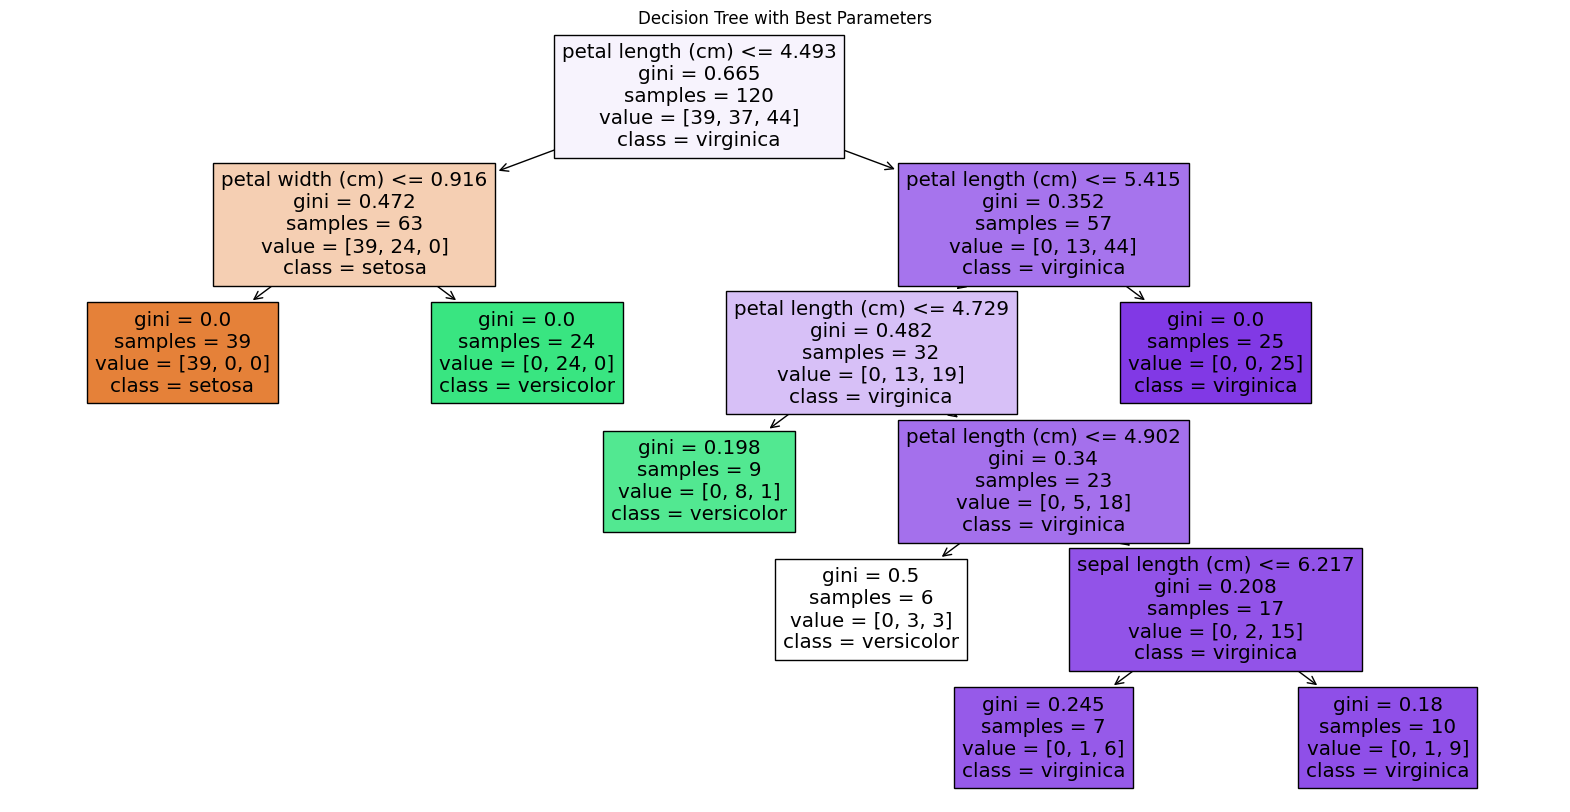

In [21]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_tree, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree with Best Parameters")
plt.show()

In [22]:
best_tree.score(X_test,y_test)

0.9333333333333333

In [23]:
from sklearn.metrics import classification_report
print(classification_report(best_tree.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.87      0.93        15
           2       0.67      1.00      0.80         4

    accuracy                           0.93        30
   macro avg       0.89      0.96      0.91        30
weighted avg       0.96      0.93      0.94        30

